<a href="https://colab.research.google.com/github/Marcelle-t/AIFinalProject/blob/main/AIFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Converting JSON to CSV (Marcelle)

In [ ]:
import pandas as pd
import json
import csv

# File paths
business_path = '/content/drive/My Drive/Yelp/CPS5801/yelp_academic_dataset_business.json'
review_path = '/content/drive/My Drive/Yelp/CPS5801/yelp_academic_dataset_review.json'
output_csv_path = '/content/drive/My Drive/Yelp/CPS5801/fast_food.csv'

# Filter Fast Food businesses
business = pd.read_json(business_path, lines=True)
fast_food_businesses = business[business['categories'].fillna('').str.contains('Fast Food', case=False, na=False)]

# Create a mapping from business_id to (name, categories)
fast_food_info = {
    row['business_id']: (row['name'], row['categories'])
    for _, row in fast_food_businesses.iterrows()
}

# Process reviews in chunks and filter
with open(output_csv_path, 'w', newline='', encoding='utf-8') as out_file:
    writer = csv.writer(out_file)
    writer.writerow(['business_id', 'name', 'categories', 'review', 'stars'])

    with open(review_path, 'r', encoding='utf-8') as review_file:
        for line in review_file:
            review = json.loads(line)
            biz_id = review['business_id']
            if biz_id in fast_food_info:
                name, categories = fast_food_info[biz_id]
                writer.writerow([
                    biz_id,
                    name,
                    categories,
                    review['text'].replace('\n', ' ').strip(),
                    review['stars']
                ])


In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/Yelp/CPS5801/fast_food.csv"
df = pd.read_csv(file_path)
df

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of each star rating
star_counts = df['stars'].value_counts().sort_index()

# Print the counts
print("Star Rating Counts:")
for star, count in star_counts.items():
    print(f"{star} stars: {count} reviews")

Star Rating Counts:
1.0 stars: 73184 reviews
2.0 stars: 24689 reviews
3.0 stars: 25660 reviews
4.0 stars: 41236 reviews
5.0 stars: 68239 reviews


Representation of the the dataset

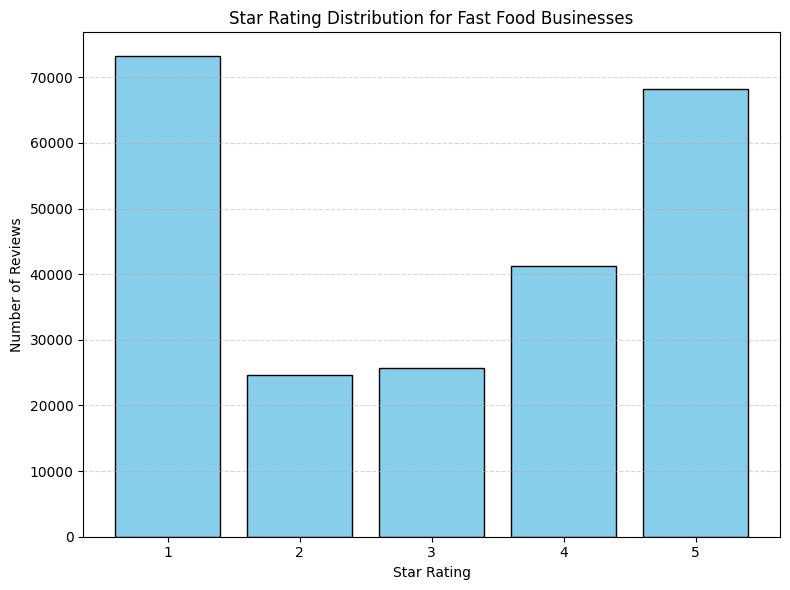

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(star_counts.index, star_counts.values, color='skyblue', edgecolor='black')
plt.title('Star Rating Distribution for Fast Food Businesses')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(star_counts.index)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('words')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Preprocessing text (Maliha)

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

# Set up lemmatizer and stopwords (excluding negations)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {
    "not", "no", "nor", "don't", "doesn't", "didn't", "won't", "wouldn't",
    "can't", "couldn't", "isn't", "aren't", "haven't", "hasn't", "hadn't", "n't"
}

def preprocess(text):
    # Normalize curly apostrophes to straight ones
    text = text.replace("’", "'")

    # Lowercase
    text = text.lower()

    # Keep letters, apostrophes, and spaces only
    text = re.sub(r"[^a-zA-Z\s']", " ", text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords (except negations) and lemmatize
    tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words and any(c.isalpha() for c in token)
    ]

    return ' '.join(tokens)
df['clean_review'] = df['review'].apply(preprocess)

In [ ]:
for i, review in enumerate(df['clean_review'].head(5), 1):
    print(f"{i}. {review}\n")

1. great burger fry salad burger hint salt pepper flavor location quaint outdoor seating friendly staff street parking well parking lot back

2. could give zero would order plain hamburger realized put bacon allergic unable eat two bite went back drive window complain didn't realize actual restaurant open almost guy took back burger said nothing disappeared minute awkwardly making conversation next people line car came back rudely told go inside get food still not get apology refuse go back ordeal shame nice variety place go dt guess freebirds

3. don't know tummy's feeling icky count chipotle's stake fix remember not go full lunch time usually go peaceful calm busy not service always friendly fast

4. one busiest chick fil a's seen always manage quick exceptional service seriously don't know quick great time one favorite place

5. love n there's mood n fulfill sometimes say patty animal style bruh



In [ ]:
# 1. Convert stars to sentiment labels
# Group reviews into sentiment categories
neg_df = df[df['stars'].isin([1, 2])]
neu_df = df[df['stars'] == 3]
pos_df = df[df['stars'].isin([4, 5])]

# Find the minimum class size to balance
min_size = min(len(neg_df), len(neu_df), len(pos_df))

# For neg and pos groups, sample equally from their respective star ratings
neg_half = min_size // 2
neg_sample = pd.concat([
    df[df['stars'] == 1].sample(n=neg_half, random_state=42),
    df[df['stars'] == 2].sample(n=neg_half, random_state=42)
])

pos_half = min_size // 2
pos_sample = pd.concat([
    df[df['stars'] == 4].sample(n=pos_half, random_state=42),
    df[df['stars'] == 5].sample(n=pos_half, random_state=42)
])

neu_sample = neu_df.sample(n=min_size, random_state=42)

# Assign sentiment labels
neg_sample['sentiment'] = 'negative'
neu_sample['sentiment'] = 'neutral'
pos_sample['sentiment'] = 'positive'

# Combine and shuffle
balanced_df = pd.concat([neg_sample, neu_sample, pos_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['stars'].value_counts())

stars
3.0    25660
4.0    12830
2.0    12830
5.0    12830
1.0    12830
Name: count, dtype: int64


First Model: Logistic Regression (Maliha)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 2))
X = vectorizer.fit_transform(balanced_df['clean_review'])
y = balanced_df['sentiment']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7349311509482983

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.80      0.79      5132
     neutral       0.63      0.62      0.63      5132
    positive       0.79      0.78      0.79      5132

    accuracy                           0.73     15396
   macro avg       0.73      0.73      0.73     15396
weighted avg       0.73      0.73      0.73     15396



Second Model: BERT (Marcelle)

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = "/content/fast_food.csv"
df = pd.read_csv(file_path)
df.head()


,business_id,name,categories,review,stars
0,bbEXAEFr4RYHLlZ-HFssTA,The Original Habit Burger Grill,"Fast Food, Burgers, Restaurants","Great burgers,fries and salad! Burgers have a...",5.0
1,Wy8Hswf2cLQGRZN6armkag,Jack in the Box,"Restaurants, Fast Food, Mexican, Tacos, Burger...","If I could give it a zero, I would. I order a ...",1.0
2,W7NxQw8UYFR0HLPrI08tvw,Chipotle Mexican Grill,"Restaurants, Fast Food, Mexican",Don't know what it is but If my tummy's feelin...,4.0
3,jOOOrH5n2ijnsZKxzPSAiw,Chick-fil-A,"Caterers, Food Delivery Services, Fast Food, F...",This is one of the busiest Chick fil A's I've ...,5.0
4,CYwC5OjwCN6ib_AQDxi3Ow,In-N-Out Burger,"Restaurants, Fast Food, Burgers",Love in n out. There's just a mood for in n ou...,5.0


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from transformers import BertTokenizer, BertModel

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and clean
file_path = "/content/fast_food.csv"
df = pd.read_csv(file_path)
df['clean_review'] = df['review'].apply(preprocess)

# Group by sentiment
neg_df = df[df['stars'].isin([1, 2])]
neu_df = df[df['stars'] == 3]
pos_df = df[df['stars'].isin([4, 5])]
min_size = min(len(neg_df), len(neu_df), len(pos_df))

neg_sample = pd.concat([
    df[df['stars'] == 1].sample(n=min_size//2, random_state=42),
    df[df['stars'] == 2].sample(n=min_size//2, random_state=42)
])
neu_sample = neu_df.sample(n=min_size, random_state=42)
pos_sample = pd.concat([
    df[df['stars'] == 4].sample(n=min_size//2, random_state=42),
    df[df['stars'] == 5].sample(n=min_size//2, random_state=42)
])

# Assign sentiment
neg_sample['sentiment'] = 'negative'
neu_sample['sentiment'] = 'neutral'
pos_sample['sentiment'] = 'positive'

# Combine and shuffle
balanced_df = pd.concat([neg_sample, neu_sample, pos_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode text
MAX_LEN = 50

def encode_reviews(reviews, tokenizer, max_len):
    inputs = tokenizer(reviews.tolist(), padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
    return inputs['input_ids'], inputs['attention_mask']

input_ids, attention_masks = encode_reviews(balanced_df['clean_review'], tokenizer, MAX_LEN)

# Encode labels
label_encoder = LabelEncoder()
balanced_df['label'] = label_encoder.fit_transform(balanced_df['sentiment'])
labels = torch.tensor(balanced_df['label'].tolist())

# Split
X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

# Dataloaders
train_dataset = TensorDataset(X_train_ids, X_train_masks, y_train)
test_dataset = TensorDataset(X_test_ids, X_test_masks, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# BERT-based model
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # [CLS] token output
        x = self.dropout(cls_output)
        x = self.fc(x)
        return x

# Model setup
model = BERTClassifier(bert_model_name='bert-base-uncased', num_classes=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Training loop
for epoch in range(5):  # Smaller epochs because BERT trains slower
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1, Loss: 1315.4368
Epoch 2, Loss: 1049.1166
Epoch 3, Loss: 814.8529
Epoch 4, Loss: 552.2829
Epoch 5, Loss: 361.9725


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import torch

def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Run evaluation on test set
evaluate_model(model, test_loader)


Test Accuracy: 0.7069

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.72      0.76      5097
     neutral       0.58      0.65      0.61      5154
    positive       0.78      0.75      0.76      5145

    accuracy                           0.71     15396
   macro avg       0.72      0.71      0.71     15396
weighted avg       0.72      0.71      0.71     15396

